## 시각화 도구

### Matplotlib - 기본 그래프 도구

- 시각화 도구 사용 이유 -> 데이터의 구조와 패턴 파악 용이

#### 선 그래프

- 선 그래프(line plot)는 연속하는 데이터 값들을 직선 또는 곡선으로 연결하여 데이터 값 가이의 관계를 나타냄
- 시계열 데이터와 같이 연속적인 값의 변화와 패턴을 파악하는데 적합

##### 기본 사용법

In [5]:
# 4.1_matplotlib_line1.py

# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# Excel 데이터를 데이터프레임으로 변환
df = pd.read_excel('/Users/youju/Downloads/5674-833_4th/part4/시도별 전출입 인구수.xlsx', engine = 'openpyxl', header = 0)

display(df.head())

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [7]:
# 4.1_matplotlib_line1.py

# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# Excel 데이터를 데이터프레임으로 변환
df = pd.read_excel('/Users/youju/Downloads/5674-833_4th/part4/시도별 전출입 인구수.xlsx', engine = 'openpyxl', header = 0)

# 누락값(NaN)을 앞 데이터로 채움(엑셀 양식 병합 부분)
df = df.fillna(method = 'ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis = 1)
df_seoul.rename({'전입지별' : '전입지'}, axis = 1, inplace = True)
df_seoul.set_index('전입지', inplace = True)

display(df_seoul.head())

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
대구광역시,-,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
인천광역시,-,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
광주광역시,-,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932


In [8]:
# 4.1_matplotlib_line1.py

# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# Excel 데이터를 데이터프레임으로 변환
df = pd.read_excel('/Users/youju/Downloads/5674-833_4th/part4/시도별 전출입 인구수.xlsx', engine = 'openpyxl', header = 0)

# 누락값(NaN)을 앞 데이터로 채움(엑셀 양식 병합 부분)
df = df.fillna(method = 'ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis = 1)
df_seoul.rename({'전입지별' : '전입지'}, axis = 1, inplace = True)
df_seoul.set_index('전입지', inplace = True)

# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']
print(sr_one)

1970    130149
1971    150313
1972     93333
1973    143234
1974    149045
1975    253705
1976    202276
1977    207722
1978    237684
1979    278411
1980    297539
1981    252073
1982    320174
1983    400875
1984    352238
1985    390265
1986    412535
1987    405220
1988    415174
1989    412933
1990    473889
1991    384714
1992    428344
1993    502584
1994    542204
1995    599411
1996    520566
1997    495454
1998    407050
1999    471841
2000    435573
2001    499575
2002    516765
2003    457656
2004    400206
2005    414621
2006    449632
2007    431637
2008    412408
2009    398282
2010    410735
2011    373771
2012    354135
2013    340801
2014    332785
2015    359337
2016    370760
2017    342433
Name: 경기도, dtype: object


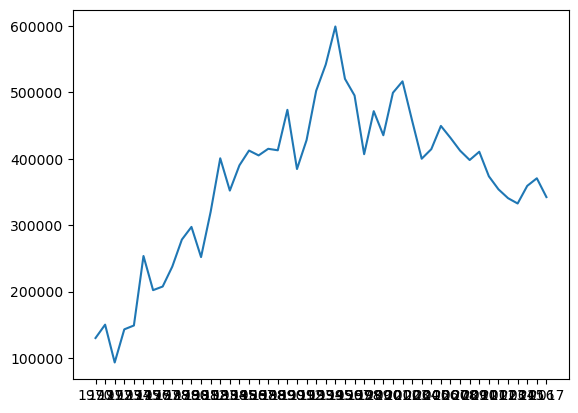

In [9]:
# 4.1_matplotlib_line1.py

# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# Excel 데이터를 데이터프레임으로 변환
df = pd.read_excel('/Users/youju/Downloads/5674-833_4th/part4/시도별 전출입 인구수.xlsx', engine = 'openpyxl', header = 0)

# 누락값(NaN)을 앞 데이터로 채움(엑셀 양식 병합 부분)
df = df.fillna(method = 'ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis = 1)
df_seoul.rename({'전입지별' : '전입지'}, axis = 1, inplace = True)
df_seoul.set_index('전입지', inplace = True)

# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']

# x축, y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)
plt.show()

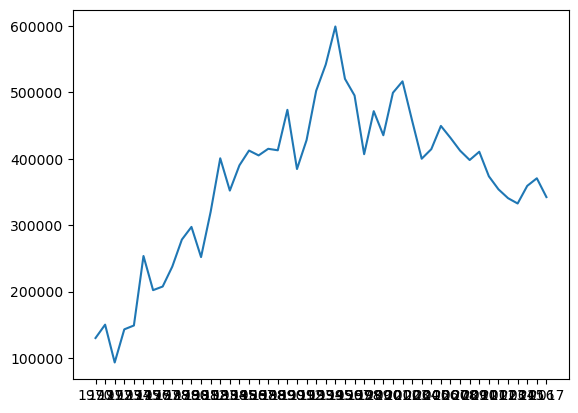

In [10]:
# 데이터프레임 객체를 plot() 함수에 직접 입력
# 판다스 객체를 plot 함수에 입력
plt.plot(sr_one)
plt.show()

##### 차트 제목, 축 이름 추가

- 그래프 객체에 차트 제목을 추가할 때는 title() 함수를 사용
- x축 이름은 xlabel() 함수를 이용
- y축 이름은 ylabel() 함수를 이용

/Users/youju/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/youju/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/youju/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/youju/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/youju/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(

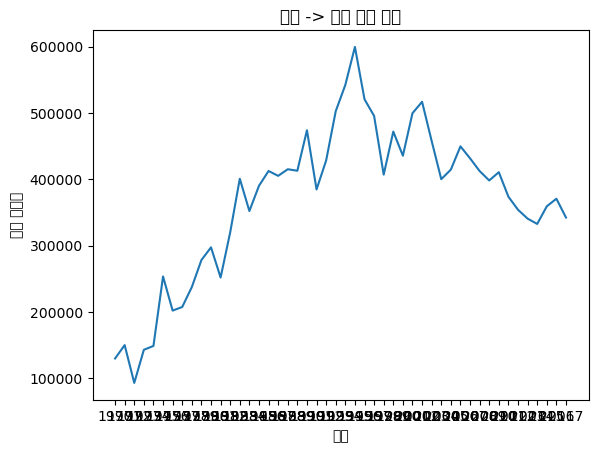

In [11]:
# 4.2_matplotlib_line2.py

# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# Excel 데이터를 데이터프레임으로 변환
df = pd.read_excel('/Users/youju/Downloads/5674-833_4th/part4/시도별 전출입 인구수.xlsx', engine = 'openpyxl', header = 0)

# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']

# x, t축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)

# 차트 제목 추가
plt.title('서울 -> 경기 인구 이동')

# 축 이름 추가
plt.xlabel('기간')
plt.ylabel('이동 인구수')

plt.show() # 변경사항 저장하고 그래프 출력

In [12]:
# Matplotlib 한글 폰트 오류 해결

from matplotlib import font_manager, rc
font_path = '/Users/youju/Downloads/5674-833_4th/part4/malgun.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font_name)

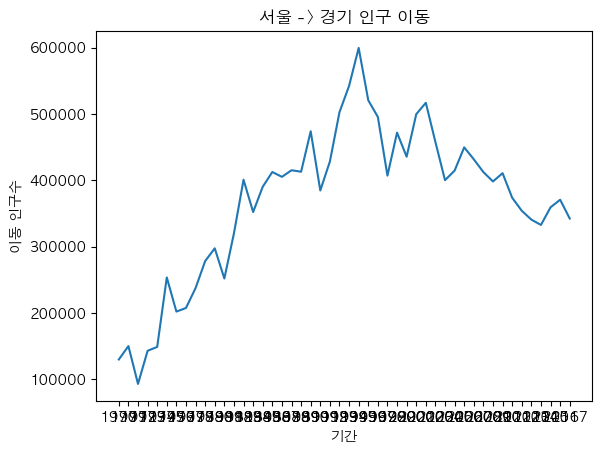

In [16]:
# 4.3_matplotlib_hangul.py

# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# Matplotlib 한글 폰트 오류 해결(mac ver)
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# Excel 데이터를 데이터프레임으로 변환
df = pd.read_excel('/Users/youju/Downloads/5674-833_4th/part4/시도별 전출입 인구수.xlsx', engine = 'openpyxl', header = 0)

# 누락값(NaN)을 앞 데이터로 채움(엑셀 양식 병합 부분)
df = df.fillna(method = 'ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis = 1)
df_seoul.rename({'전입지별' : '전입지'}, axis = 1, inplace = True)
df_seoul.set_index('전입지', inplace = True)

# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']

# x, t축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)

# 차트 제목 추가
plt.title('서울 -> 경기 인구 이동')

# 축 이름 추가
plt.xlabel('기간')
plt.ylabel('이동 인구수')

plt.show() # 변경사항 저장하고 그래프 출력

##### 그래프 꾸미기

- x축 눈금 라벨의 글씨가 서로 겹쳐 잘 보이지 않는 문제        
-> 눈금 라벨이 들어갈 만한 충분한 여유 공간이 없어서 발생하는 문제

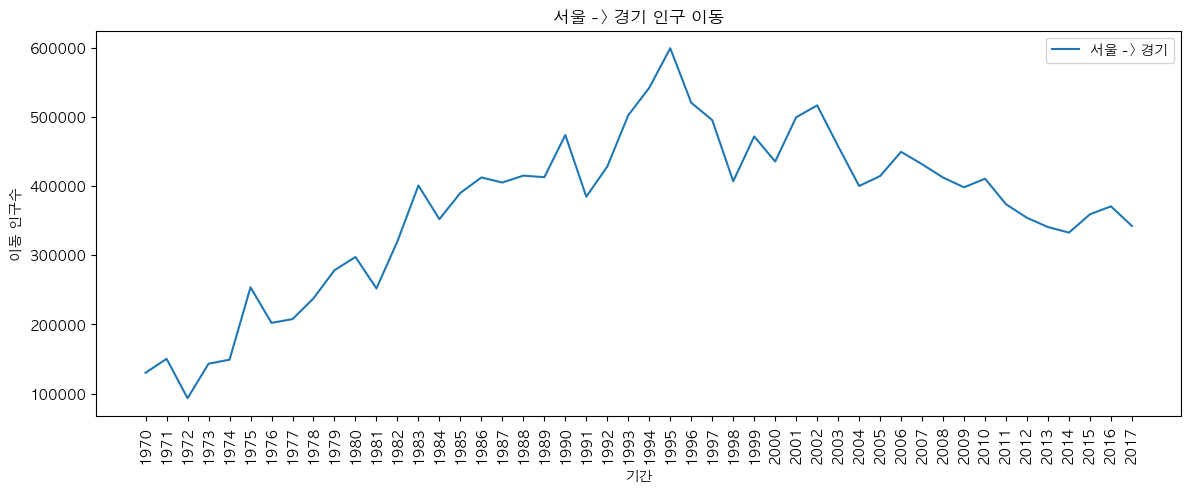

In [20]:
# 4.4_matplotlib_line3.py

# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# Matplotlib 한글 폰트 오류 해결(mac ver)
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# Excel 데이터를 데이터프레임으로 변환
df = pd.read_excel('/Users/youju/Downloads/5674-833_4th/part4/시도별 전출입 인구수.xlsx', engine = 'openpyxl', header = 0)

# 누락값(NaN)을 앞 데이터로 채움(엑셀 양식 병합 부분)
df = df.fillna(method = 'ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis = 1)
df_seoul.rename({'전입지별' : '전입지'}, axis = 1, inplace = True)
df_seoul.set_index('전입지', inplace = True)

# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']

# 그림 사이즈 지정(가로 14인치, 세로 5인치)
plt.figure(figsize = (14, 5))

# x축 눈금 라벨 회전하기
plt.xticks(rotation = 'vertical') # 반시계 방향으로 90도 회전

# x, y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)

# 차트 제목 추가
plt.title('서울 -> 경기 인구 이동')
# 축 이름 추가
plt.xlabel('기간')
plt.ylabel('이동 인구수')

plt.legend(labels = ['서울 -> 경기'], loc = 'best') # 범례 표시

plt.show() # 변경사항 저장하고 그래프 출력


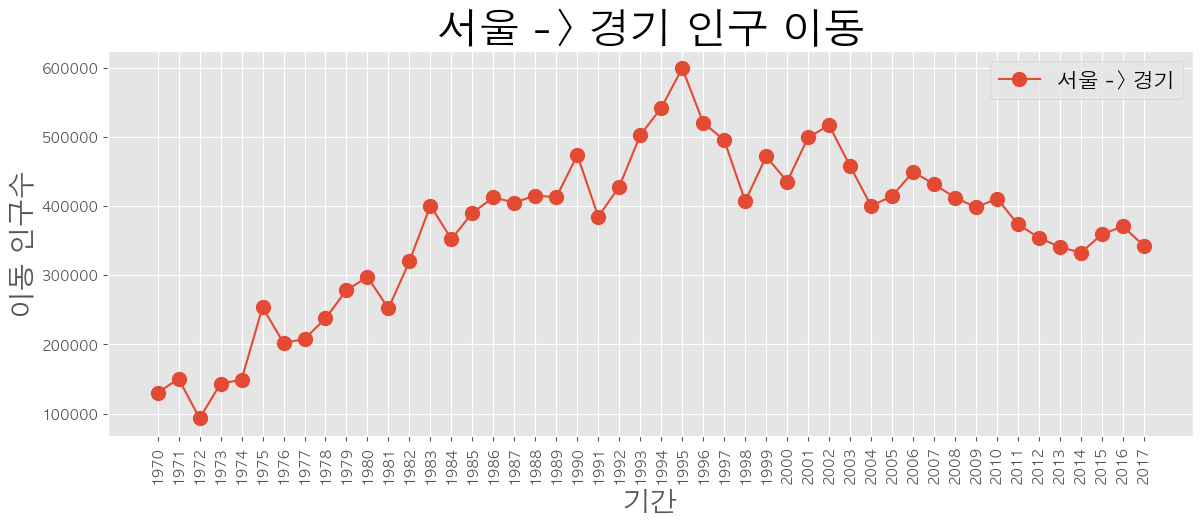

In [21]:
# 4.5_matplotlib_line4.py

# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# Matplotlib 한글 폰트 오류 해결(mac ver)
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# Excel 데이터를 데이터프레임으로 변환
df = pd.read_excel('/Users/youju/Downloads/5674-833_4th/part4/시도별 전출입 인구수.xlsx', engine = 'openpyxl', header = 0)

# 누락값(NaN)을 앞 데이터로 채움(엑셀 양식 병합 부분)
df = df.fillna(method = 'ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis = 1)
df_seoul.rename({'전입지별' : '전입지'}, axis = 1, inplace = True)
df_seoul.set_index('전입지', inplace = True)

# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']

# 스타일 서식 지정
plt.style.use('ggplot')

# 그림 사이즈 지정(가로 14인치, 세로 5인치)
plt.figure(figsize = (14, 5))

# x축 눈금 라벨 회전하기
plt.xticks(size = 10, rotation = 'vertical') # 반시계 방향으로 90도 회전

# x, y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values, marker = 'o', markersize = 10) # 마커 표시 추가

# 차트 제목 추가
plt.title('서울 -> 경기 인구 이동', size = 30)
# 축 이름 추가
plt.xlabel('기간', size = 20)
plt.ylabel('이동 인구수', size = 20)

plt.legend(labels = ['서울 -> 경기'], loc = 'best', fontsize = 15) # 범례 표시

plt.show() # 변경사항 저장하고 그래프 출력

- 스타일 서식을 지정하는 것은 Matplotlib 실행 환경 설정을 변경하는 것      
-> 다른 파일을 실행할 때도 계속 적용됨

In [22]:
# 4.6_matplotlib_style.py

# 라이브러리 불러오기
import matplotlib.pyplot as plt

# 스타일 리스트 출력
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


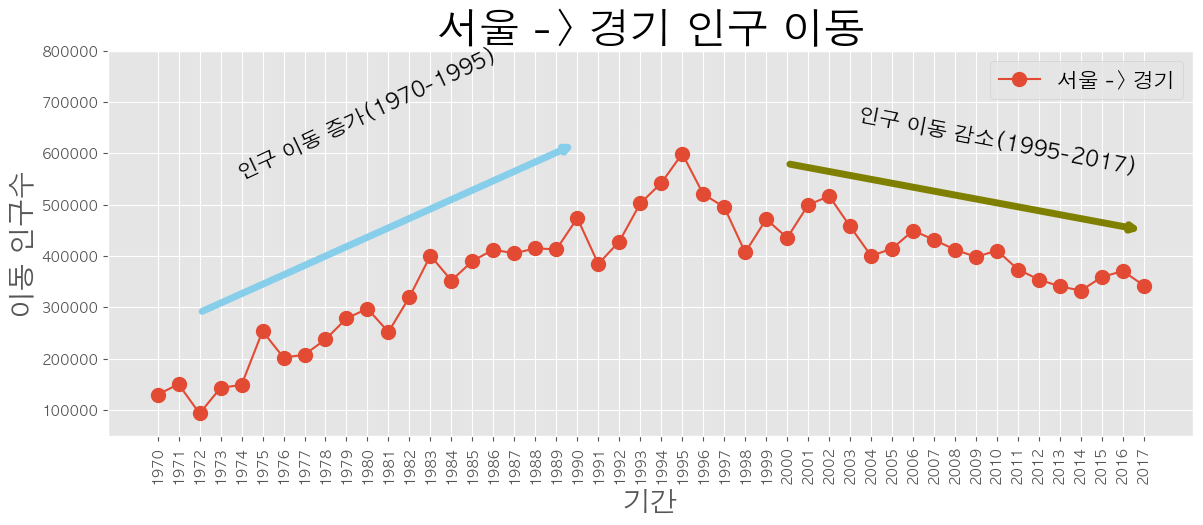

In [ ]:
# 4.7_matplotlib_annotate.py

# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# Matplotlib 한글 폰트 오류 해결(mac ver)
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# Excel 데이터를 데이터프레임으로 변환
df = pd.read_excel('/Users/youju/Downloads/5674-833_4th/part4/시도별 전출입 인구수.xlsx', engine = 'openpyxl', header = 0)

# 누락값(NaN)을 앞 데이터로 채움(엑셀 양식 병합 부분)
df = df.fillna(method = 'ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis = 1)
df_seoul.rename({'전입지별' : '전입지'}, axis = 1, inplace = True)
df_seoul.set_index('전입지', inplace = True)

# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']

# 스타일 서식 지정
plt.style.use('ggplot')

# 그림 사이즈 지정(가로 14인치, 세로 5인치)
plt.figure(figsize = (14, 5))

# x축 눈금 라벨 회전하기
plt.xticks(size = 10, rotation = 'vertical') # 반시계 방향으로 90도 회전

# x, y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values, marker = 'o', markersize = 10) # 마커 표시 추가

# 차트 제목 추가
plt.title('서울 -> 경기 인구 이동', size = 30)
# 축 이름 추가
plt.xlabel('기간', size = 20)
plt.ylabel('이동 인구수', size = 20)

plt.legend(labels = ['서울 -> 경기'], loc = 'best', fontsize = 15) # 범례 표시

# y축 범위 지정(최소값, 최대값)
plt.ylim(50000, 800000) # y축 범위 넓힘

# 주석 표시 - 화살표
plt.annotate('',
             xy = (20, 620000), # 화살표 머리 부분(끝점)
             xytext = (2, 290000), # 화살표의 꼬리 부분(시작점)
             xycoords = 'data', # 좌표체계
             arrowprops = dict(arrowstyle = '->', color = 'skyblue', lw = 5), # 화살표 서식
             )

plt.annotate('',
             xy = (47, 450000), # 화살표 머리 부분(끝점)
             xytext = (30, 580000), # 화살표의 꼬리 부분(시작점)
             xycoords = 'data', # 좌표체계
             arrowprops = dict(arrowstyle = '->', color = 'olive', lw = 5), # 화살표 서식
             )

# 주석 표시 - 텍스트
plt.annotate('인구 이동 증가(1970-1995)', # 텍스트 입력
             xy = (10, 550000), # 텍스트 위치 기준점
             rotation = 25, # 텍스트 회전 각도
             va = 'baseline', # 텍스트 상하 정렬
            ha = 'center', # 텍스트 좌우 정렬
            fontsize = 15, # 폰트 크기
            )
plt.annotate('인구 이동 감소(1995-2017)', # 텍스트 입력
             xy = (40, 560000), # 텍스트 위치 기준점
             rotation = -11, # 텍스트 회전 각도
             va = 'baseline', # 텍스트 상하 정렬
            ha = 'center', # 텍스트 좌우 정렬
            fontsize = 15, # 폰트 크기
            )

plt.show() # 변경사항 저장하고 그래프 출력

##### 화면 분할하여 그래프 여러 개 그리기 - axe 객체 활용

- 화면을 여러 개로 분할하고 분할된 각 화면에 서로 다른 그래프를 그리는 방법
- 여러 개의 axe 객체를 만들고, 분할된 화면마다 axe 객체를 하나씩 배정
- axe 객체는 각각 서로 다른 그래프를 표현할 수 있음
- 한 화면에서 여러 개의 그래프를 비교하거나 다양한 정보를 동시에 보여줄 때 사용하면 좋음
- axe 객체를 1개만 생성하는 경우에는 하나의 그래프만 표시됨

/var/folders/t0/85xt099562dflgf6nvxdqgl00000gn/T/ipykernel_20262/1902394436.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(sr_one.index, rotation = 75)
/var/folders/t0/85xt099562dflgf6nvxdqgl00000gn/T/ipykernel_20262/1902394436.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(sr_one.index, rotation = 75)


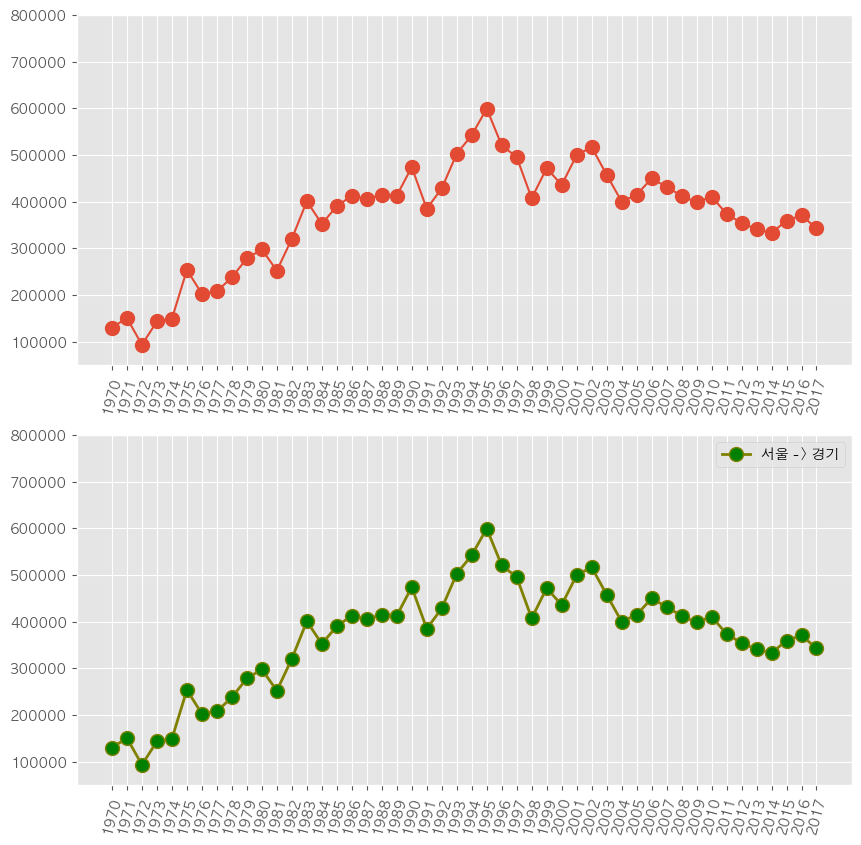

In [32]:
# 4.8_matplotlib_lines1.py

# 생략 (4.7과 동일)

# 그래프 객체 생성(figure에 2개의 서브 플롯 생성)
fig = plt.figure(figsize = (10, 10)) # 전체 그래프 크기 지정
ax1 = fig.add_subplot(2, 1, 1) # 2행 1열 중 첫 번째 subplot
ax2 = fig.add_subplot(2, 1, 2) # 2행

# axe 객체에 plit 함수로 그래프 출력
ax1.plot(sr_one.index, sr_one.values, marker = 'o', markersize = 10)
ax2.plot(sr_one, marker = 'o', markerfacecolor = 'green', markersize = 10,
         color = 'olive', linewidth = 2, label = '서울 -> 경기')
ax2.legend(loc = 'best')

# y축 범위 지정(최소값, 최대값)
ax1.set_ylim(50000, 800000) # y축 범위 넓힘
ax2.set_ylim(50000, 800000) # y축 범위 넓힘

# 축 눈금 라벨 지정 및 75도 회전
ax1.set_xticklabels(sr_one.index, rotation = 75)
ax2.set_xticklabels(sr_one.index, rotation = 75)

plt.show() # 변경사항 저장하고 그래프 출력

- 'o' -> 선 그래프가 아니라 점 그래프로 표현
- marker = 'o' -> 마커 모양('o', '+', '*', '.')
- markerfacecolor = 'green' -> 마커 배경색
- markersize = 10 -> 마커 크기
- color = 'olive' -> 선의 색
- linewidth = 2 -> 선의 두께
- label = '서울 -> 경기' -> 라벨 지정

/var/folders/t0/85xt099562dflgf6nvxdqgl00000gn/T/ipykernel_20262/2701225686.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sr_one.index, rotation = 75)


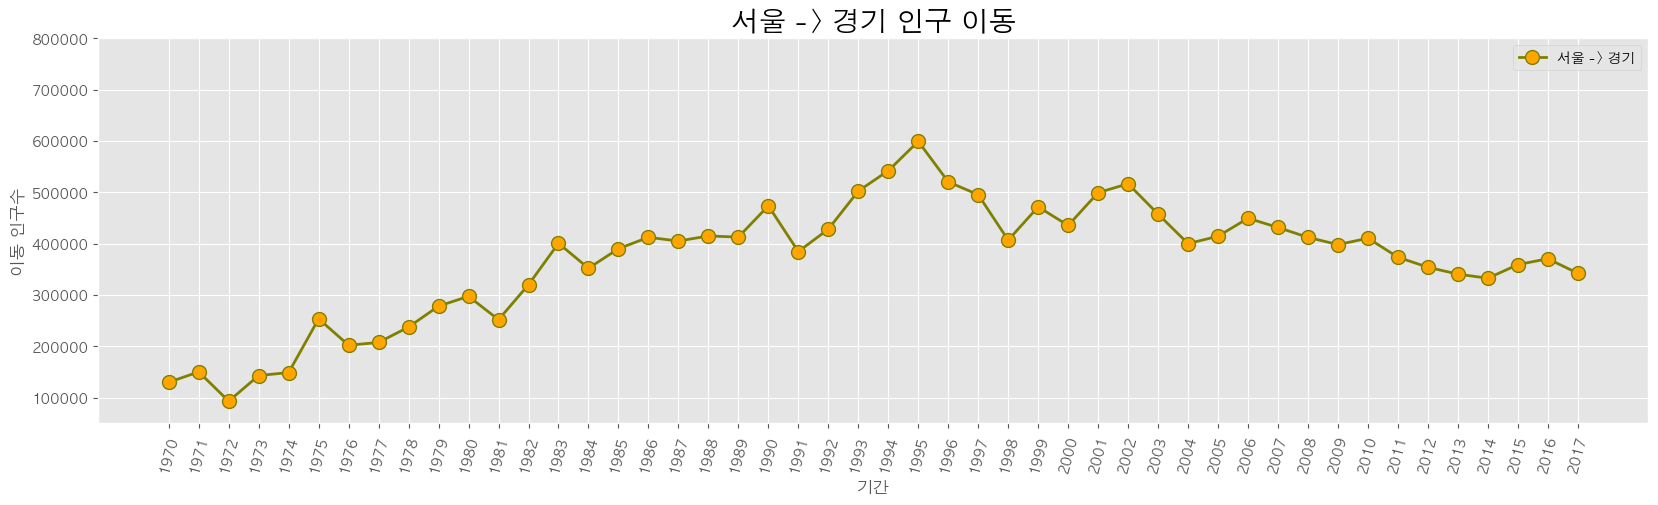

In [33]:
# 4.9_matplotlib_lines2.py

# 생략 (4.8과 동일)

# 그래프 객체 생성(figure에 1개의 서브 플롯 생성)
fig = plt.figure(figsize = (20, 5)) # 전체 그래프 크기 지정
ax = fig.add_subplot(1, 1, 1) # 1행 1열 중 첫 번째 subplot

# axe 객체에 plit 함수로 그래프 출력
ax.plot(sr_one, marker = 'o', markerfacecolor = 'orange', markersize = 10,
         color = 'olive', linewidth = 2, label = '서울 -> 경기')
ax.legend(loc = 'best')

# y축 범위 지정(최소값, 최대값)
ax.set_ylim(50000, 800000) # y축 범위 넓힘

# 차트 제목 추가
ax.set_title('서울 -> 경기 인구 이동', size = 20)

# 축 이름 추가
ax.set_xlabel('기간', size = 12)
ax.set_ylabel('이동 인구수', size = 12)

# 축 눈금 라벨 지정 및 75도 회전
ax.set_xticklabels(sr_one.index, rotation = 75)

# 축 눈금 라벨 크기
ax.tick_params(axis = 'x', labelsize = 10)
ax.tick_params(axis = 'y', labelsize = 10)

plt.show() # 변경사항 저장하고 그래프 출력

/var/folders/t0/85xt099562dflgf6nvxdqgl00000gn/T/ipykernel_20262/454029937.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_3.columns, rotation = 90)


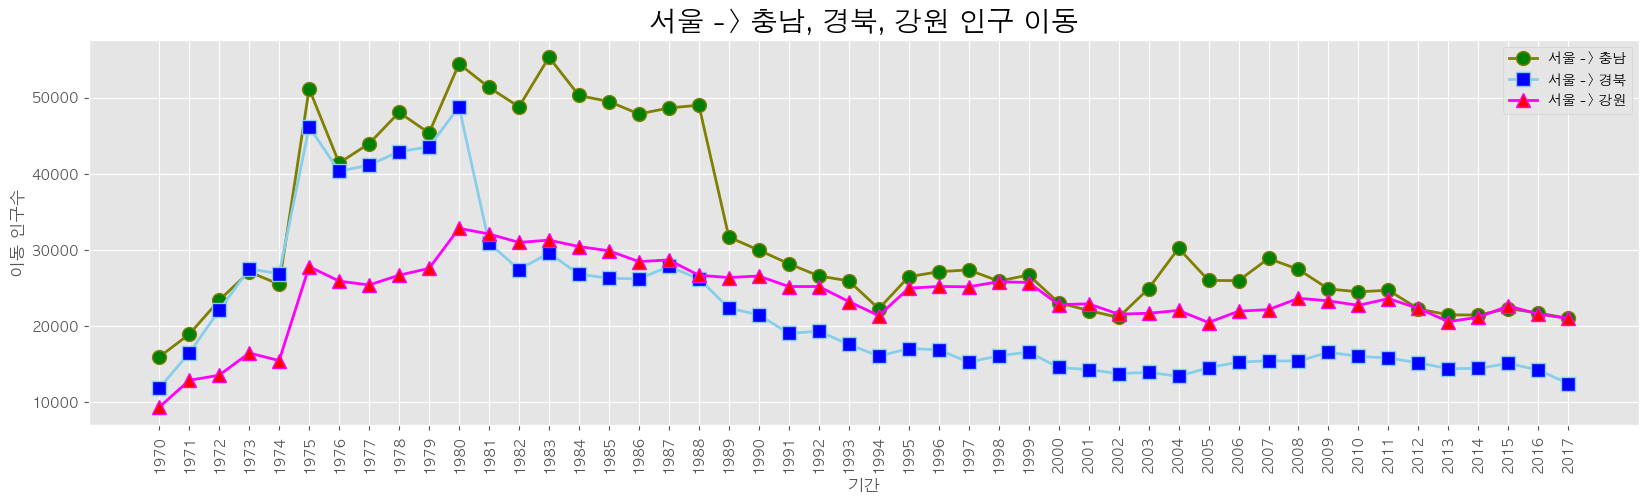

In [35]:
# 4.10_matplotlib_lines3.py

# 생략 (4.9과 동일)

# 서울에서 '충청남도', '경상북도', '강원도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018))) # 1970 ~ 2017년 연도 리스트 생성
df_3 = df_seoul.loc[['충청남도', '경상북도', '강원도'], col_years]

# 스타일 서식 지정
plt.style.use('ggplot')

# 그래프 객체 생성(figure에 1개의 서브 플롯 생성)
fig = plt.figure(figsize = (20, 5)) # 전체 그래프 크기 지정
ax = fig.add_subplot(1, 1, 1) # 1행

# axe 객체에 plot 함수로 그래프 출력
ax.plot(df_3.columns, df_3.loc['충청남도'], marker = 'o', markerfacecolor = 'green',
        markersize = 10, color = 'olive', linewidth = 2, label = '서울 -> 충남')
ax.plot(df_3.columns, df_3.loc['경상북도'], marker = 's', markerfacecolor = 'blue',
        markersize = 10, color = 'skyblue', linewidth = 2, label = '서울 -> 경북')
ax.plot(df_3.columns, df_3.loc['강원도'], marker = '^', markerfacecolor = 'red',
        markersize = 10, color = 'magenta', linewidth = 2, label = '서울 -> 강원')

# 범례 표시
ax.legend(loc = 'best')

# 차트 제목 추가
ax.set_title('서울 -> 충남, 경북, 강원 인구 이동', size = 20)

# 축 이름 추가
ax.set_xlabel('기간', size = 12)
ax.set_ylabel('이동 인구수', size = 12)

# 축 눈금 라벨 지정 및 90도 회전
ax.set_xticklabels(df_3.columns, rotation = 90)

# 축 눈금 라벨 크기
ax.tick_params(axis = 'x', labelsize = 10)
ax.tick_params(axis = 'y', labelsize = 10)

plt.show() # 변경사항 저장하고 그래프 출력

/var/folders/t0/85xt099562dflgf6nvxdqgl00000gn/T/ipykernel_20262/1937108073.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df_4.columns, rotation = 90)
/var/folders/t0/85xt099562dflgf6nvxdqgl00000gn/T/ipykernel_20262/1937108073.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(df_4.columns, rotation = 90)
/var/folders/t0/85xt099562dflgf6nvxdqgl00000gn/T/ipykernel_20262/1937108073.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(df_4.columns, rotation = 90)
/var/folders/t0/85xt099562dflgf6nvxdqgl00000gn/T/ipykernel_20262/1937108073.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(df_4.columns, rotation = 90)


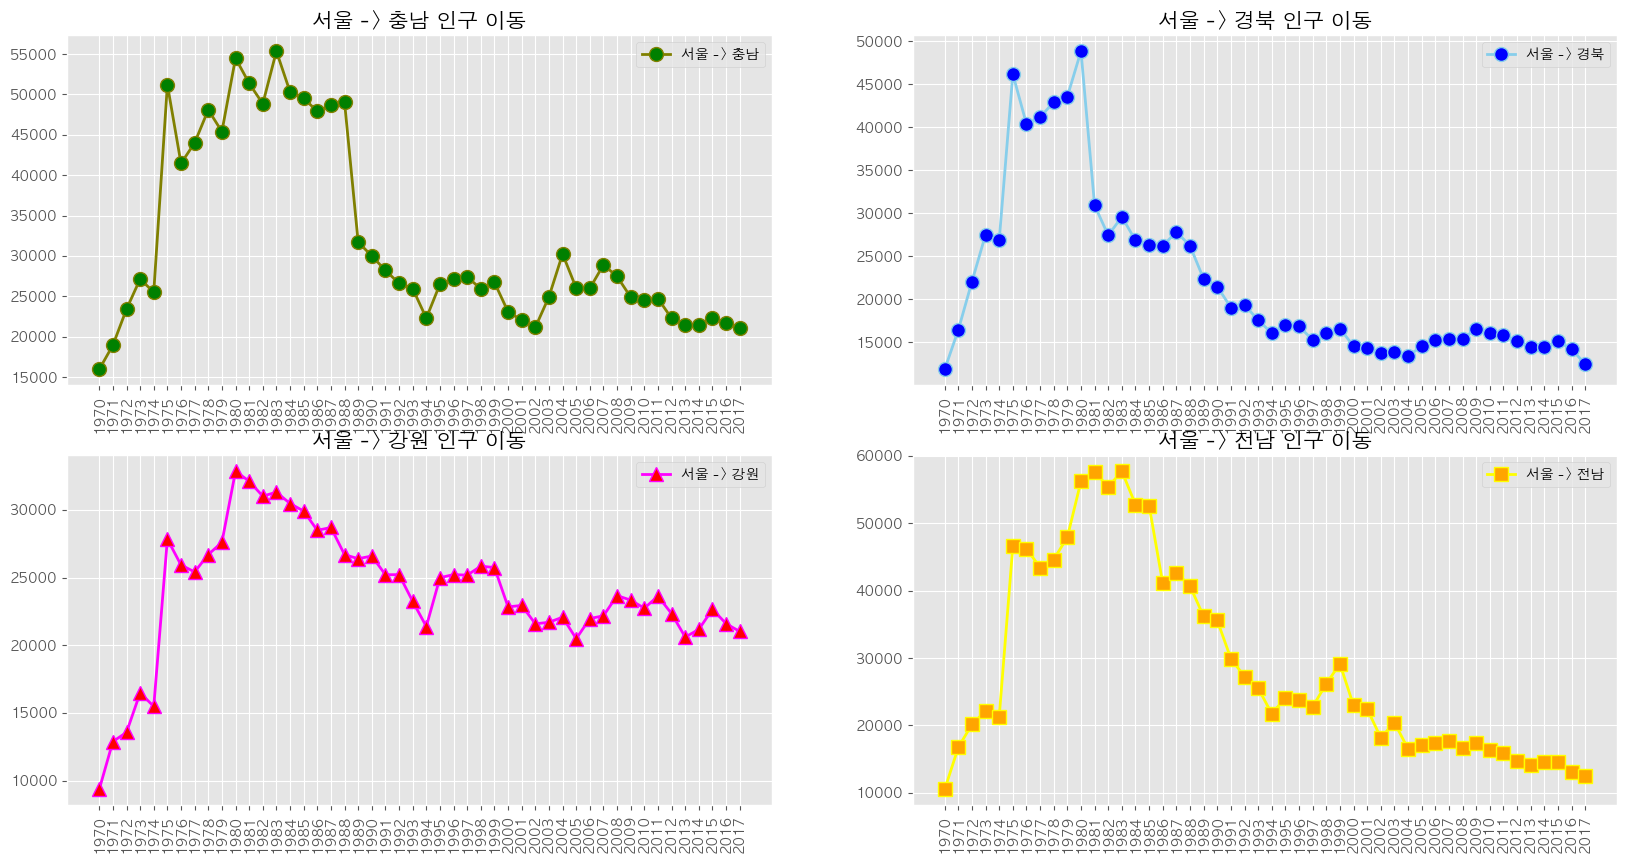

In [36]:
# 4.11_matplotlib_lines4.py

# 생략 (4.10과 동일)

# 서울에서 '충청남도', '경상북도', '강원도', '전라남도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018))) # 1970 ~ 2017년 연도 리스트 생성
df_4 = df_seoul.loc[['충청남도', '경상북도', '강원도', '전라남도'], col_years]

# 스타일 서식 지정
plt.style.use('ggplot')

# 그래프 객체 생성(figure에 1개의 서브 플롯 생성)
fig = plt.figure(figsize = (20, 10)) # 전체 그래프 크기 지정
ax1 = fig.add_subplot(2, 2, 1) # 2행 2열 중 첫 번째 subplot
ax2 = fig.add_subplot(2, 2, 2) # 2행 2열 중 두 번째 subplot
ax3 = fig.add_subplot(2, 2, 3) # 2행 2열 중 세 번째 subplot
ax4 = fig.add_subplot(2, 2, 4) # 2행 2열 중 네 번째 subplot

# axe 객체에 plot 함수로 그래프 출력
ax1.plot(df_4.columns, df_4.loc['충청남도'], marker = 'o', markerfacecolor = 'green',
        markersize = 10, color = 'olive', linewidth = 2, label = '서울 -> 충남')
ax2.plot(df_4.columns, df_4.loc['경상북도'], marker = 'o', markerfacecolor = 'blue',
        markersize = 10, color = 'skyblue', linewidth = 2, label = '서울 -> 경북')
ax3.plot(df_4.columns, df_4.loc['강원도'], marker = '^', markerfacecolor = 'red',
        markersize = 10, color = 'magenta', linewidth = 2, label = '서울 -> 강원')
ax4.plot(df_4.columns, df_4.loc['전라남도'], marker = 's', markerfacecolor = 'orange',
        markersize = 10, color = 'yellow', linewidth = 2, label = '서울 -> 전남')

# 범례 표시
ax1.legend(loc = 'best')
ax2.legend(loc = 'best')
ax3.legend(loc = 'best')
ax4.legend(loc = 'best')

# 차트 제목 추가
ax1.set_title('서울 -> 충남 인구 이동', size = 15)
ax2.set_title('서울 -> 경북 인구 이동', size = 15)
ax3.set_title('서울 -> 강원 인구 이동', size = 15)
ax4.set_title('서울 -> 전남 인구 이동', size = 15)

# 축 눈금 라벨 지정 및 90도 회전
ax1.set_xticklabels(df_4.columns, rotation = 90)
ax2.set_xticklabels(df_4.columns, rotation = 90)
ax3.set_xticklabels(df_4.columns, rotation = 90)
ax4.set_xticklabels(df_4.columns, rotation = 90)

plt.show() # 변경사항 저장하고 그래프 출력

In [38]:
# 4.12_matplotlib_color.py
# 사용할 수 있는 색상 종류 확인

# 라이브러리 불러오기
import matplotlib

# 컬러 정보를 담을 빈 딕셔너리 생성
color_dict = {}

# 컬러 이름과 헥사코드 확인하여 딕셔너리에 입력
for name, hex in matplotlib.colors.cnames.items():
    color_dict[name] = hex

# 딕셔너리 출력
print(color_dict)

{'aliceblue': '#F0F8FF', 'antiquewhite': '#FAEBD7', 'aqua': '#00FFFF', 'aquamarine': '#7FFFD4', 'azure': '#F0FFFF', 'beige': '#F5F5DC', 'bisque': '#FFE4C4', 'black': '#000000', 'blanchedalmond': '#FFEBCD', 'blue': '#0000FF', 'blueviolet': '#8A2BE2', 'brown': '#A52A2A', 'burlywood': '#DEB887', 'cadetblue': '#5F9EA0', 'chartreuse': '#7FFF00', 'chocolate': '#D2691E', 'coral': '#FF7F50', 'cornflowerblue': '#6495ED', 'cornsilk': '#FFF8DC', 'crimson': '#DC143C', 'cyan': '#00FFFF', 'darkblue': '#00008B', 'darkcyan': '#008B8B', 'darkgoldenrod': '#B8860B', 'darkgray': '#A9A9A9', 'darkgreen': '#006400', 'darkgrey': '#A9A9A9', 'darkkhaki': '#BDB76B', 'darkmagenta': '#8B008B', 'darkolivegreen': '#556B2F', 'darkorange': '#FF8C00', 'darkorchid': '#9932CC', 'darkred': '#8B0000', 'darksalmon': '#E9967A', 'darkseagreen': '#8FBC8F', 'darkslateblue': '#483D8B', 'darkslategray': '#2F4F4F', 'darkslategrey': '#2F4F4F', 'darkturquoise': '#00CED1', 'darkviolet': '#9400D3', 'deeppink': '#FF1493', 'deepskyblue'

### 면적 그래프

- 면적 그래프(area plot)는 각 열이 데이터를 선 그래프로 구현
- 선 그래프와 x축 사이의 공간에 색이 입혀짐
- 색의 투명도(alpha)는 기본값 0.5로 투과되어 보임(0~1)
- 선 그래프를 그리는 plot() 메소드에 kind = 'area' 옵션을 추가하면 간단하게 그릴 수 있음

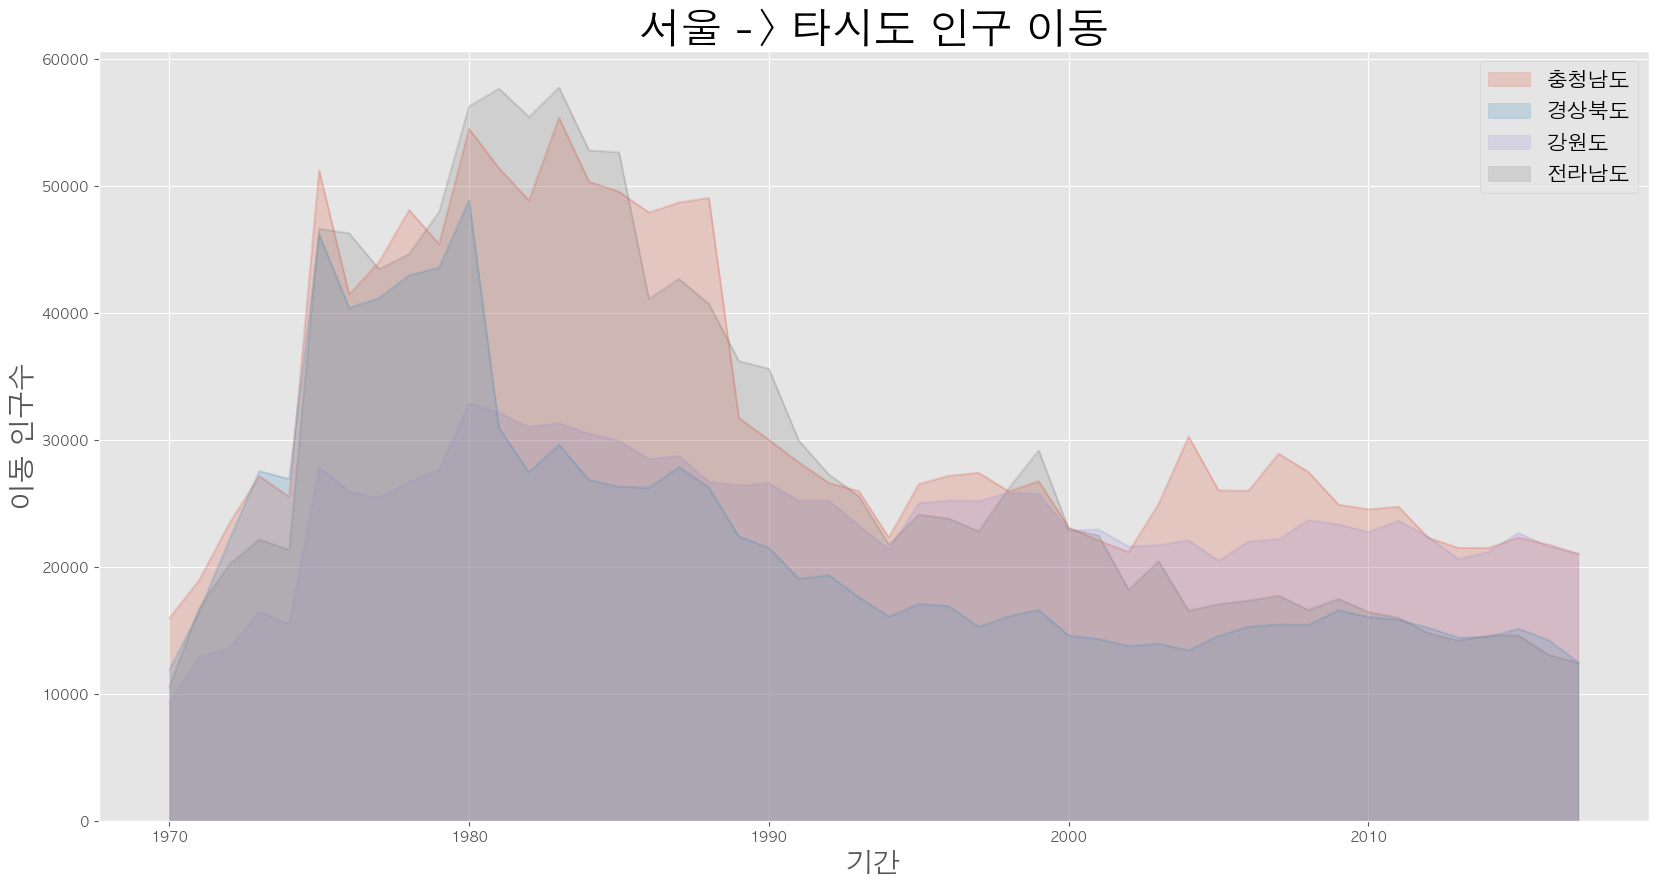

In [39]:
# 4.13_matplotlib_area1.py

# 생략 (4.11과 동일)

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis = 1)
df_seoul.rename({'전입지별' : '전입지'}, axis = 1, inplace = True)
df_seoul.set_index('전입지', inplace = True)

# 서울에서 '충청남도', '경상북도', '강원도', '전라남도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018))) # 1970 ~ 2017년 연도 리스트 생성
df_4 = df_seoul.loc[['충청남도', '경상북도', '강원도', '전라남도'], col_years]
df_4 = df_4.transpose() # 행과 열 바꾸기(전치행렬)

# 스타일 서식 지정
plt.style.use('ggplot')

# 데이터프레임의 인덱스를 정수형으로 변경(x축 눈금 라벨 표시)
df_4.index = df_4.index.map(int)

# 면적 그래프 그리기
df_4.plot(kind = 'area', stacked = False, alpha = 0.2, figsize = (20, 10))

plt.title('서울 -> 타시도 인구 이동', size = 30)
plt.xlabel('기간', size = 20)
plt.ylabel('이동 인구수', size = 20)
plt.legend(loc = 'best', fontsize = 15)

plt.show() # 변경사항 저장하고 그래프 출력

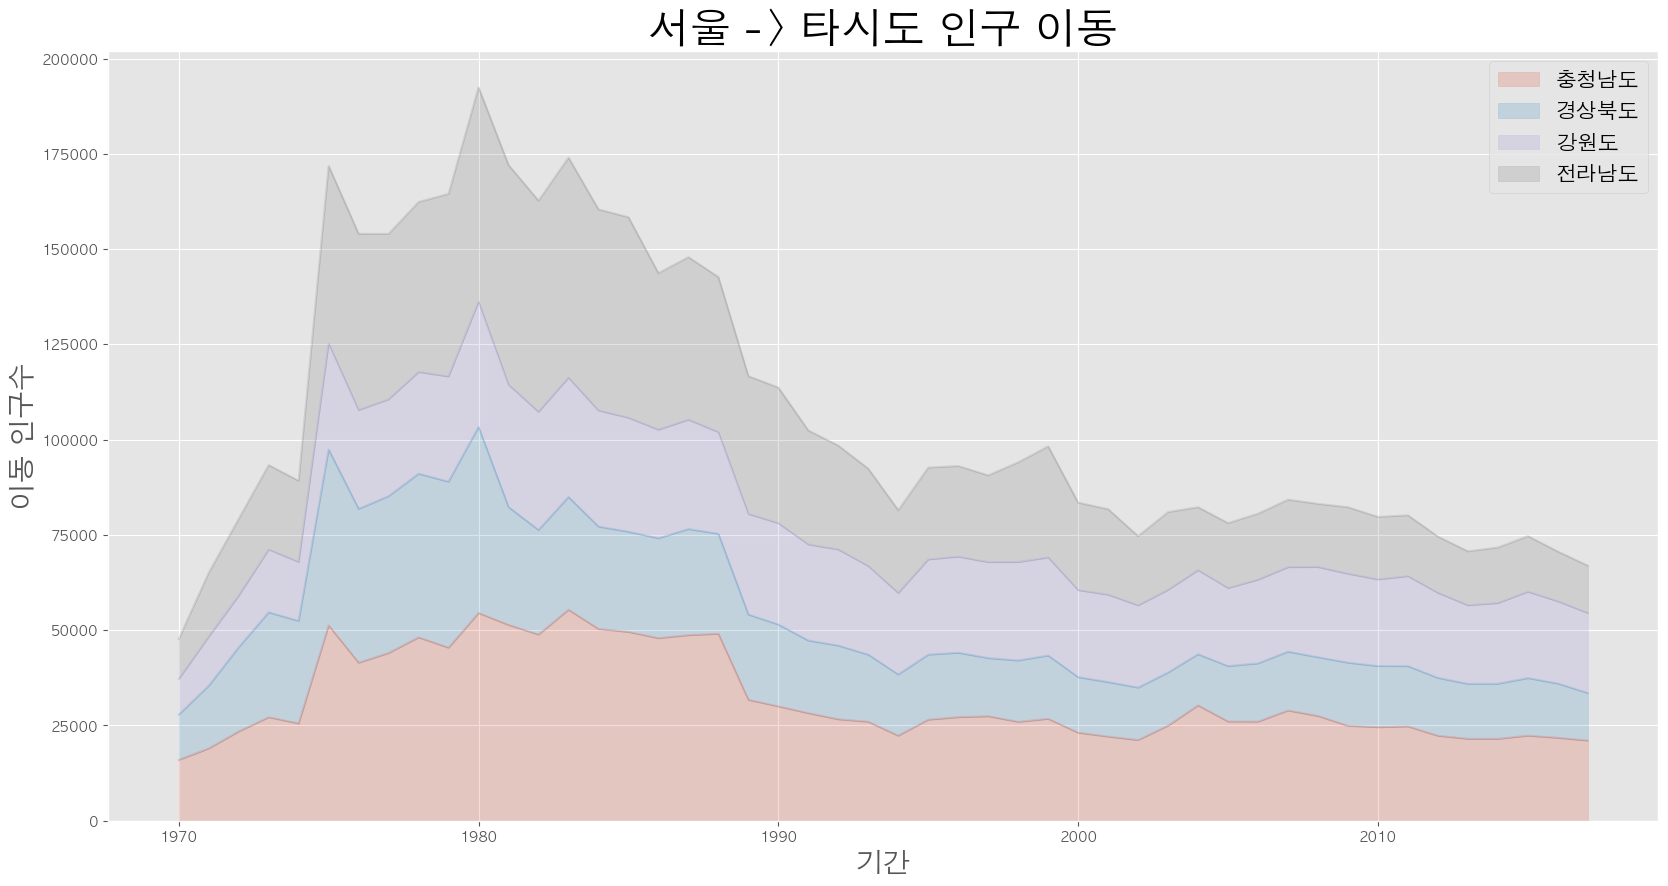

In [40]:
# 4.14_matplotlib_area2.py
# stacked = True -> 선 그래프들이 서로 겹치지 않고 위 아래로 데이터가 누적되는 면적 그래프

# 생략 (4.13과 동일)

# 데이터프레임의 인덱스를 정수형으로 변경(x축 눈금 라벨 표시)
df_4.index = df_4.index.map(int)

# 면적 그래프 그리기
df_4.plot(kind = 'area', stacked = True, alpha = 0.2, figsize = (20, 10))

plt.title('서울 -> 타시도 인구 이동', size = 30)
plt.xlabel('기간', size = 20)
plt.ylabel('이동 인구수', size = 20)
plt.legend(loc = 'best', fontsize = 15)

plt.show() # 변경사항 저장하고 그래프 출력

<class 'matplotlib.axes._axes.Axes'>


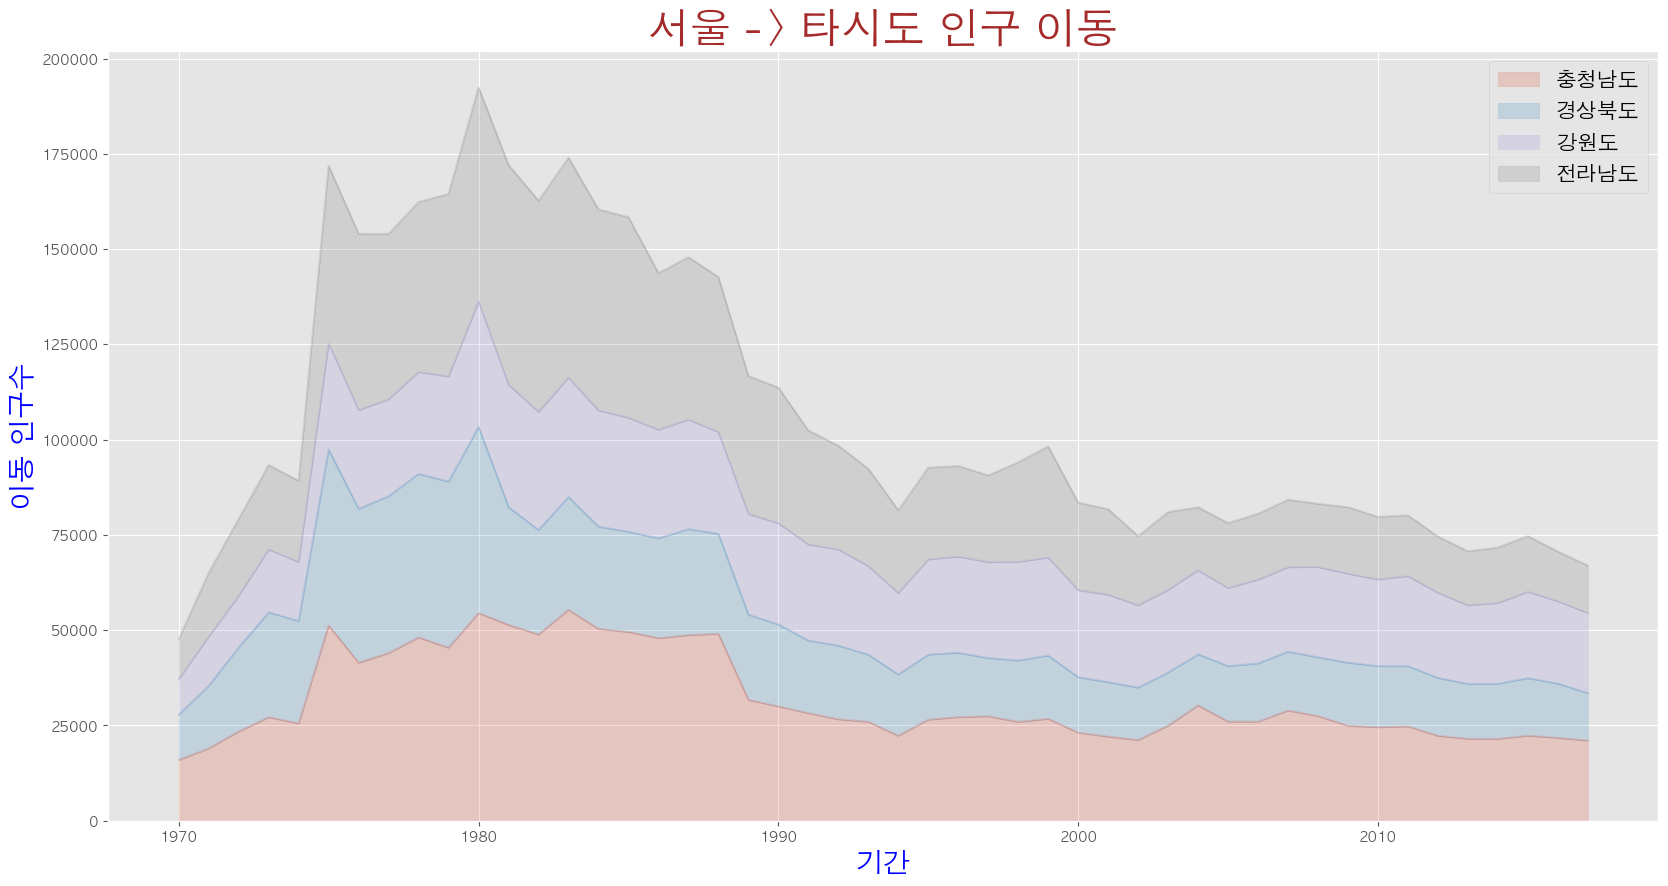

In [42]:
# 4.15_matplotlib_area3.py
# axe 객체의 세부적인 요소 설정

# 생략 (4.14과 동일)

# 데이터프레임의 인덱스를 정수형으로 변경(x축 눈금 라벨 표시)
df_4.index = df_4.index.map(int)

# 면적 그래프 axe 객체 생성
ax = df_4.plot(kind = 'area', stacked = True, alpha = 0.2, figsize = (20, 10))
print(type(ax)) # axe 객체 타입 출력

# axe 객체 설정 변경
ax.set_title('서울 -> 타시도 인구 이동', size = 30, color = 'brown', weight = 'bold')
ax.set_xlabel('기간', size = 20, color = 'blue')
ax.set_ylabel('이동 인구수', size = 20, color = 'blue')
ax.legend(loc = 'best', fontsize = 15)

plt.show() # 변경사항 저장하고 그래프 출력

#### 막대 그래프

- 데이터 값의 크기에 비례하여 높이를 갖는 직사각형 막대로 표현
- 막대의 높이는 상대적 길이의 차이를 통해 값의 크고 작음을 설명
- 세로형과 가로형 막대 그래프 두 종류
- 세로형의 경우 정보 제공 측면에서 보면 선 그래프와 큰 차이 없음
- 가로형 막대 그래프는 각 변수 사이 값의 크기 차이를 설명하는데 적합

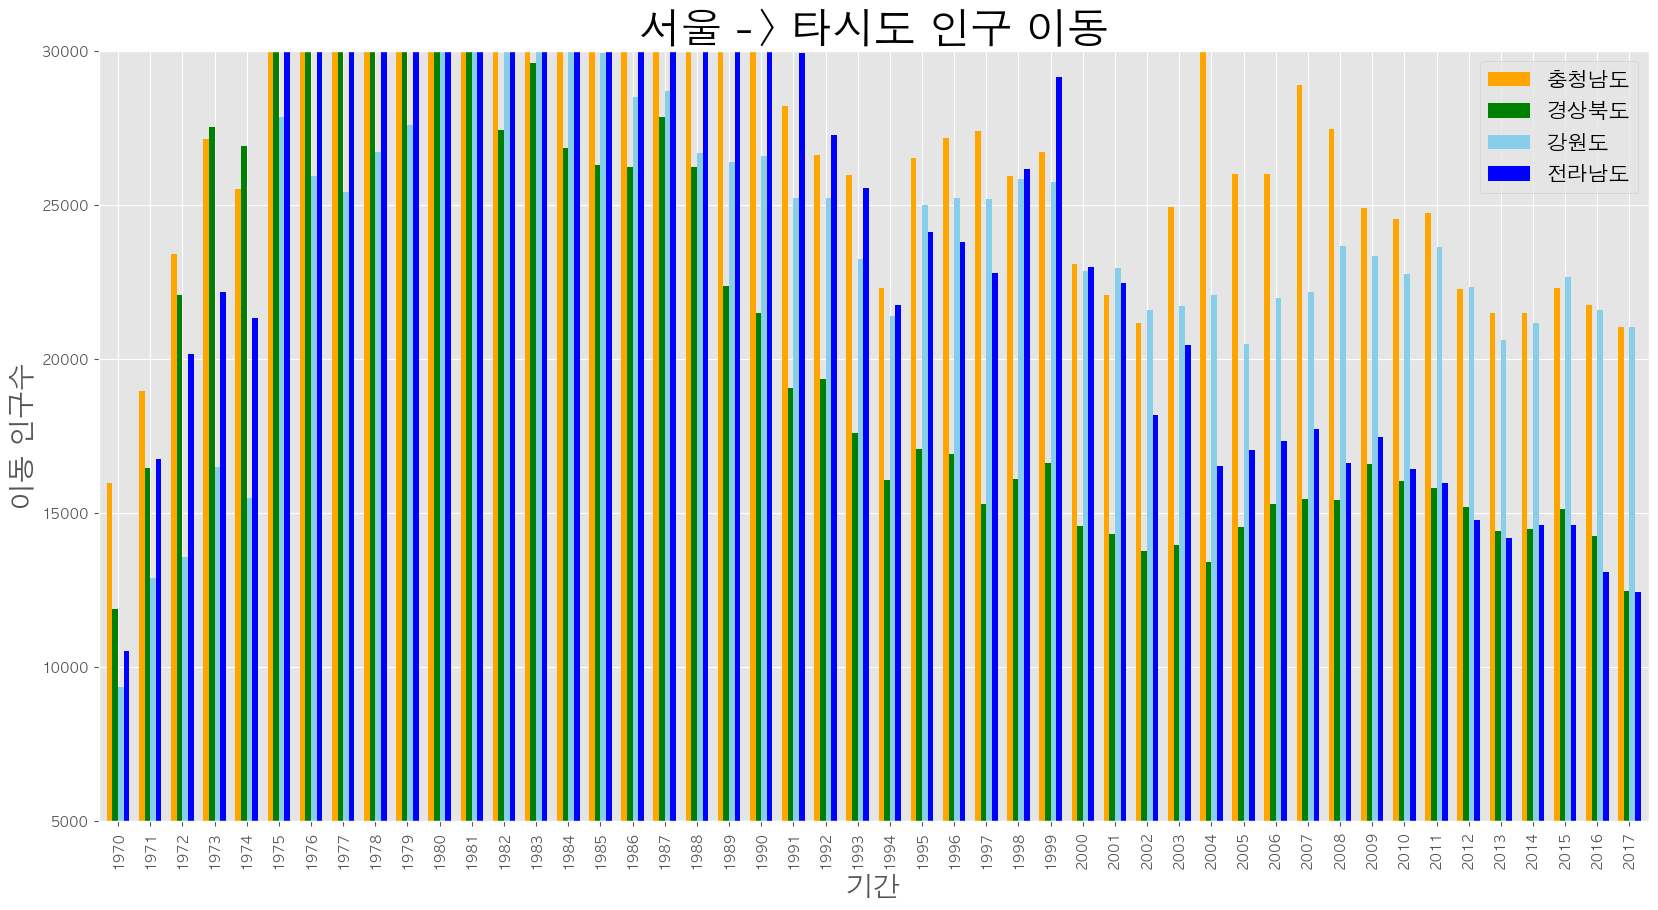

In [47]:
# 4.1_matplotlib_bar1.py

# 생략 (4.15과 동일)

# 서울에서 '충청남도', '경상북도', '강원도', '전라남도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018))) # 1970 ~ 2017년 연도 리스트 생성
df_4 = df_seoul.loc[['충청남도', '경상북도', '강원도', '전라남도'], col_years]
df_4 = df_4.transpose() # 행과 열 바꾸기(전치행렬)

# 스타일 서식 지정
plt.style.use('ggplot')

# 데이터프레임의 인덱스를 정수형으로 변경(x축 눈금 라벨 표시)
df_4.index = df_4.index.map(int)

# 막대 그래프 그리기
df_4.plot(kind = 'bar', figsize = (20, 10), width = 0.7,
          color = ['orange', 'green', 'skyblue', 'blue'])

plt.title('서울 -> 타시도 인구 이동', size = 30)
plt.xlabel('기간', size = 20)
plt.ylabel('이동 인구수', size = 20)
plt.ylim(5000, 30000) # y축 범위 지정
plt.legend(loc = 'best', fontsize = 15)

plt.show() # 변경사항 저장하고 그래프 출력

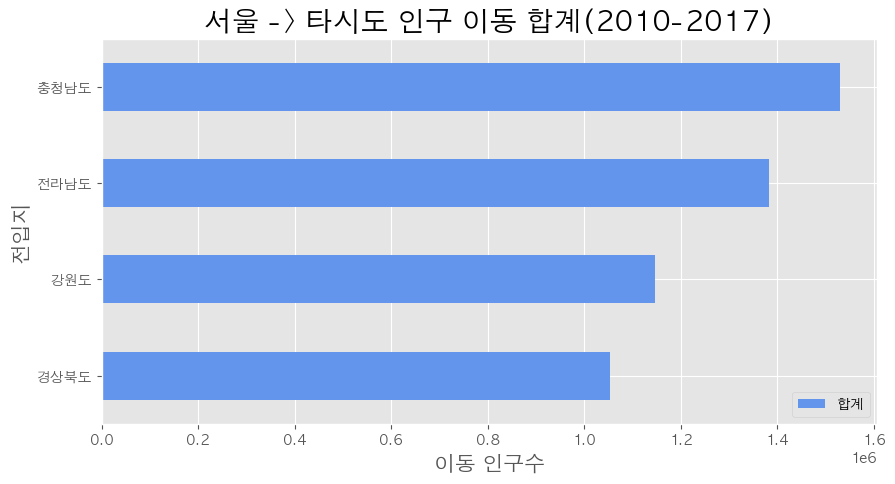

In [48]:
# 4.17_matplotlib_barh1.py

# 생략 (4.16과 동일)

# 서울에서 '충청남도', '경상북도', '강원도', '전라남도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018))) # 1970 ~ 2017년 연도 리스트 생성
df_4 = df_seoul.loc[['충청남도', '경상북도', '강원도', '전라남도'], col_years]

# 2010-2017년 이동 인구 수를 합계하여 새로운 열로 추가
df_4['합계'] = df_4.sum(axis = 1)

# 가장 큰 값부터 정렬
df_total = df_4[['합계']].sort_values(by = '합계', ascending = True)

# 스타일 서식 지정
plt.style.use('ggplot')

# 가로 막대 그래프 그리기
df_total.plot(kind = 'barh', figsize = (10, 5), color = 'cornflowerblue', width = 0.5)

plt.title('서울 -> 타시도 인구 이동 합계(2010-2017)', size = 20)
plt.xlabel('이동 인구수', size = 15)
plt.ylabel('전입지', size = 15)

plt.show() # 변경사항 저장하고 그래프 출력

보조 축을 추가하여 2개의 y축을 갖는 그래프

/var/folders/t0/85xt099562dflgf6nvxdqgl00000gn/T/ipykernel_20262/1437202615.py:15: FutureWarning: convert_float is deprecated and will be removed in a future version.
  df = pd.read_excel('/Users/youju/Downloads/5674-833_4th/part4/남북한발전전력량.xlsx', engine = 'openpyxl', convert_float = True)


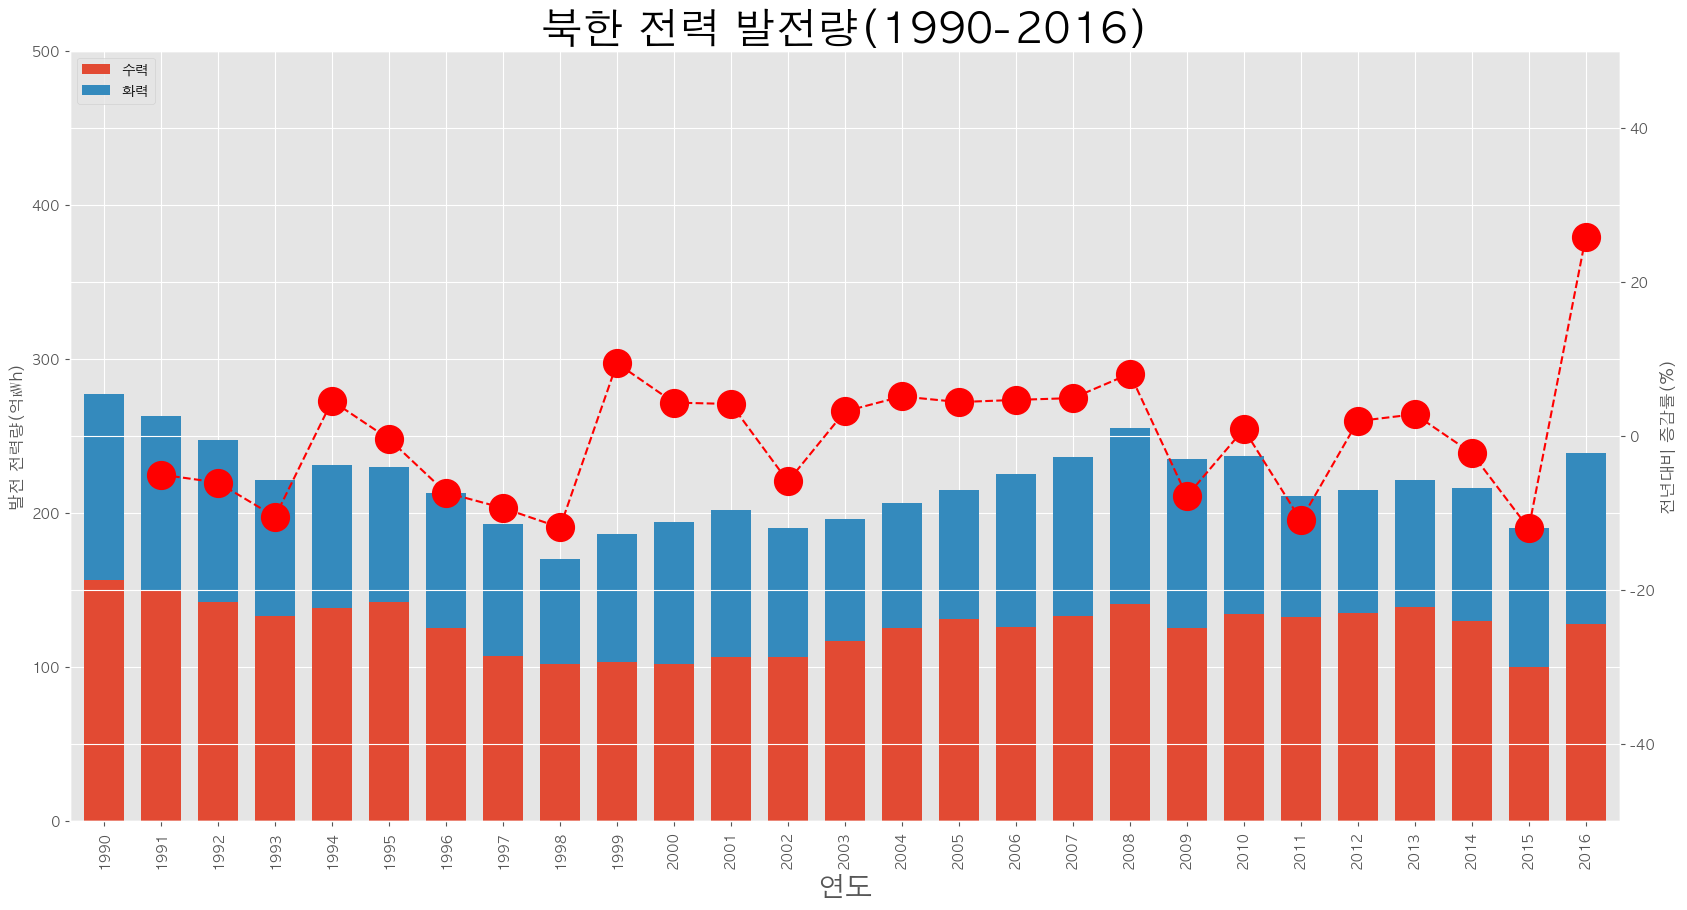

In [51]:
# 4.18_matplotlib_secondary.py

# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# Matplotlib 한글 폰트 오류 해결(mac ver)
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

plt.style.use('ggplot') # 스타일 서식 지정
plt.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용 시 마이너스 폰트 깨지는 현상 해결

# Excel 데이터를 데이터프레임으로 변환
df = pd.read_excel('/Users/youju/Downloads/5674-833_4th/part4/남북한발전전력량.xlsx', engine = 'openpyxl', convert_float = True)
df = df.loc[5:9]
df.drop('전력량 (억㎾h)', axis = 'columns', inplace = True)
df.set_index('발전 전력별', inplace = True)
df = df.T

# 증감률(변동률) 계산
df = df.rename(columns = {'합계' : '총발전량'})
df['총발전량 - 1년'] = df['총발전량'].shift(1) # 1년 전 데이터 추가
df['증감률'] = ((df['총발전량'] /  df['총발전량 - 1년']) - 1) * 100

# 2축 그래프 그리기
ax1 = df[['수력', '화력']].plot(kind = 'bar', figsize = (20, 10), width = 0.7, stacked = True)
ax2 = ax1.twinx() # 2번째 축 생성
ax2.plot(df.index, df.증감률, ls = '--', marker = 'o', markersize = 20,
         color = 'red', label = '전년대비 증감률(%)')

ax1.set_ylim(0, 500)
ax2.set_ylim(-50, 50)

ax1.set_xlabel('연도', size = 20)
ax1.set_ylabel('발전 전력량(억㎾h)')
ax2.set_ylabel('전년대비 증감률(%)')

plt.title('북한 전력 발전량(1990-2016)', size = 30)
ax1.legend(loc = 'upper left')

plt.show() # 변경사항 저장하고 그래프 출력

#### 히스토그램

- 변수가 하나인 단변수 데이터의 빈도수를 그래프로 표현
- x축을 같은 크기의 여러 구간으로 나누고, 각 구간에 속하는 데이터 값의 개수(빈도)를 y축에 표시
- 구간을 나누는 간격의 크기에 따라 빈도가 달라지고 히스토그램의 모양이 변함

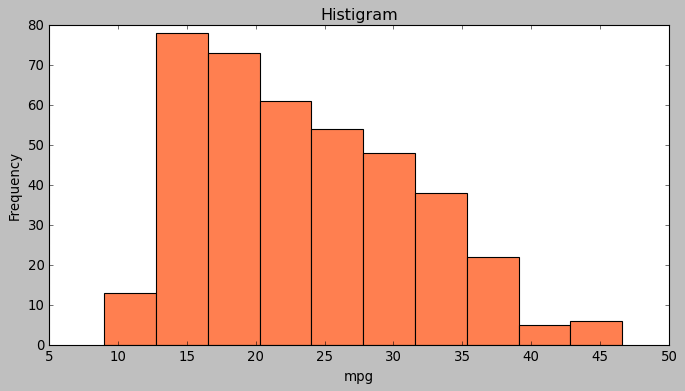

In [52]:
# 4.19_matplotlib_hist.py

# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('classic') # 스타일 서식 지정

# read_csv() 함수로 df 생성
df = pd.read_csv('/Users/youju/Downloads/5674-833_4th/part4/auto-mpg.csv', header = None)

df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower',
              'weight', 'acceleration', 'model year', 'origin', 'name']

# 연비(mpg) 열에 대한 히스토그램 그리기
df['mpg'].plot(kind = 'hist', bins = 10, figsize = (10, 5), color = 'coral')

# 그래프 꾸미기
plt.title('Histigram')
plt.xlabel('mpg')

plt.show() # 변경사항 저장하고 그래프 출력

#### 산점도

- 서로 다른 두 변수 사이의 관계를 나타냄
- 각 변수는 연속되는 값을 가짐 (일반적으로 정수형 또는 실수형 값)
- 2개의 연속 변수를 각각 x축과 y축에 하나씩 놓고, 데이터 값이 위치하는 (x, y) 좌표를 찾아서 점으로 표시

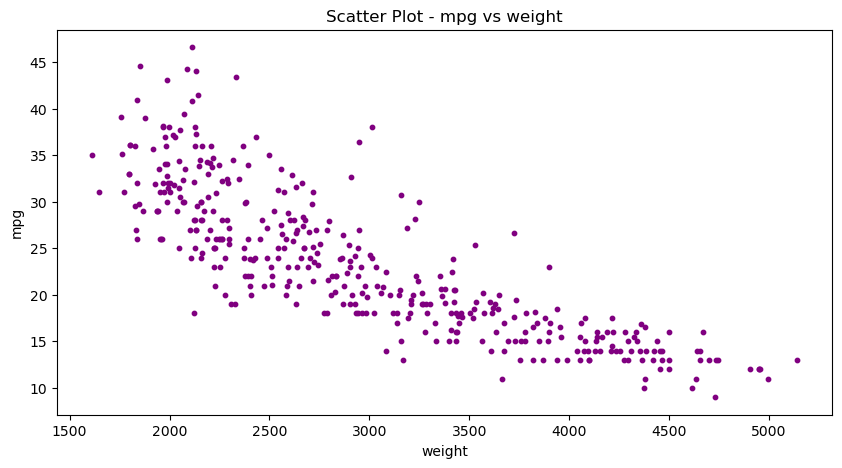

In [53]:
# 4.20_matplotlib_scatter.py

# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('default') # 스타일 서식 지정

# read_csv() 함수로 df 생성
df = pd.read_csv('/Users/youju/Downloads/5674-833_4th/part4/auto-mpg.csv', header = None)

df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower',
              'weight', 'acceleration', 'model year', 'origin', 'name']

# 연비(mpg)와 차중(weight) 열에 대한 산점도 그리기
df.plot(kind = 'scatter', x = 'weight', y = 'mpg', figsize = (10, 5), color = 'purple', s = 10)
plt.title('Scatter Plot - mpg vs weight')

plt.show() # 변경사항 저장하고 그래프 출력

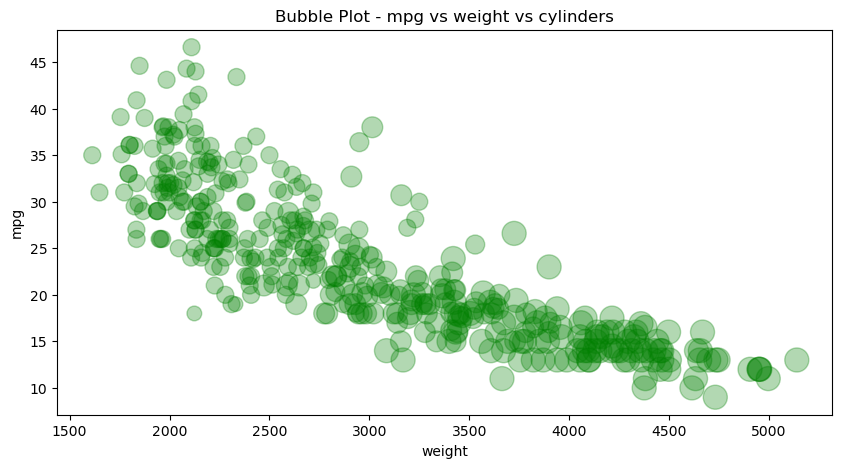

In [56]:
# 4.21_matplotlib_bubble.py

# cylinders 개수의 상대적 비율을 계산하여 시리즈 생성
cylinders_size = df.cylinders / df.cylinders.max() * 300

# 3개의 변수로 산점도 그리기
df.plot(kind = 'scatter', x = 'weight', y = 'mpg', figsize = (10, 5),
        color = 'green', s = cylinders_size, alpha = 0.3)

plt.title('Bubble Plot - mpg vs weight vs cylinders')

plt.show() # 변경사항 저장하고 그래프 출력

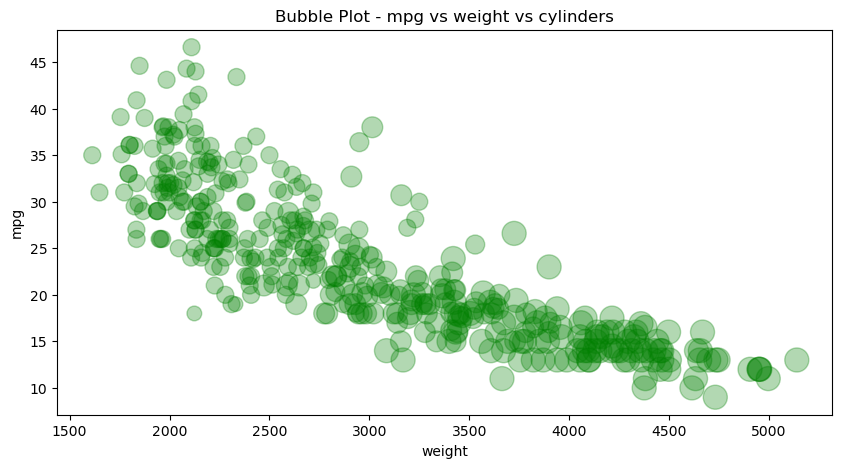

In [57]:
# 4.22_matplotlib_bubble2.py

# cylinders 개수의 상대적 비율을 계산하여 시리즈 생성
cylinders_size = df.cylinders / df.cylinders.max() * 300

# 3개의 변수로 산점도 그리기
df.plot(kind = 'scatter', x = 'weight', y = 'mpg', figsize = (10, 5),
        color = 'green', s = cylinders_size, alpha = 0.3)
plt.title('Bubble Plot - mpg vs weight vs cylinders')

plt.savefig('/Users/youju/Downloads/5674-833_4th/part4/scatter.png')
plt.savefig('/Users/youju/Downloads/5674-833_4th/part4/scatter_transparent.png', transparent = True)

plt.show() # 변경사항 저장하고 그래프 출력

#### 파이 차트

- 원을 파이 조각처럼 나누어서 표현
- 조각의 크기는 해당 변수에 속하는 데이터 값의 크기에 비례함
- plot() 메서드에 kind = 'pie' 옵션을 사용하여 그림

           mpg  cylinders  displacement    weight  acceleration  model year  \
origin                                                                        
1       5000.8       1556       61229.5  837121.0        3743.4       18827   
2       1952.4        291        7640.0  169631.0        1175.1        5307   
3       2405.6        324        8114.0  175477.0        1277.6        6118   

        count  
origin         
1         249  
2          70  
3          79  


/var/folders/t0/85xt099562dflgf6nvxdqgl00000gn/T/ipykernel_20262/2231039473.py:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_origin = df.groupby('origin').sum() # origin 열을 기준으로 그룹화, 합계 연산


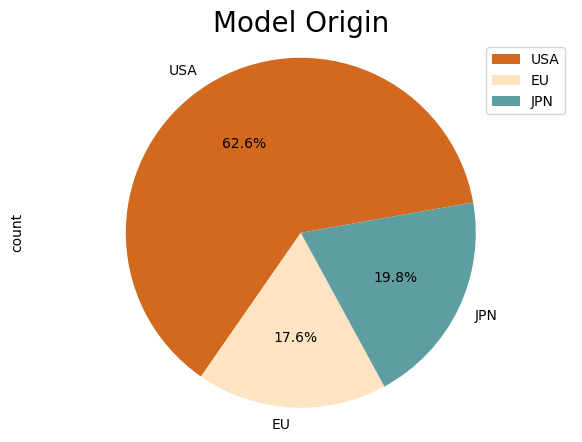

In [59]:
# 4.23_matplotlib_pie.py

# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('default') # 스타일 서식 지정

# read_csv() 함수로 df 생성
df = pd.read_csv('/Users/youju/Downloads/5674-833_4th/part4/auto-mpg.csv', header = None)

df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower',
              'weight', 'acceleration', 'model year', 'origin', 'name'] 

# 데이터 개수 카운트를 위해 값 1을 가진 열 추가
df['count'] = 1
df_origin = df.groupby('origin').sum() # origin 열을 기준으로 그룹화, 합계 연산
print(df_origin.head())

# 제조국가(origin) 값을 실제 지역명으로 변경
df_origin.index = ['USA', 'EU', 'JPN']

# 제조국가(origin) 열에 대한 파이 차트 그리기 - count 열 데이터 사용
df_origin['count'].plot(kind = 'pie',
                         figsize = (7, 5),
                         autopct = '%1.1f%%', # 퍼센트% 표시
                         startangle = 10, # 파이 조각을 나누는 시작점(각도 표시)
                         colors = ['chocolate', 'bisque', 'cadetblue'] # 색상 리스트
                         )

plt.title('Model Origin', size = 20)
plt.axis('equal') # 파이 차트의 비율을 같게(원에 가깝게) 조정
plt.legend(labels = df_origin.index, loc = 'upper right') # 범례 표시

plt.show() # 변경사항 저장하고 그래프 출력

#### 박스 플롯

- 범주형 데이터의 분포를 파악하는데 적합

/var/folders/t0/85xt099562dflgf6nvxdqgl00000gn/T/ipykernel_20262/441045270.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster') # 스타일 서식 지정


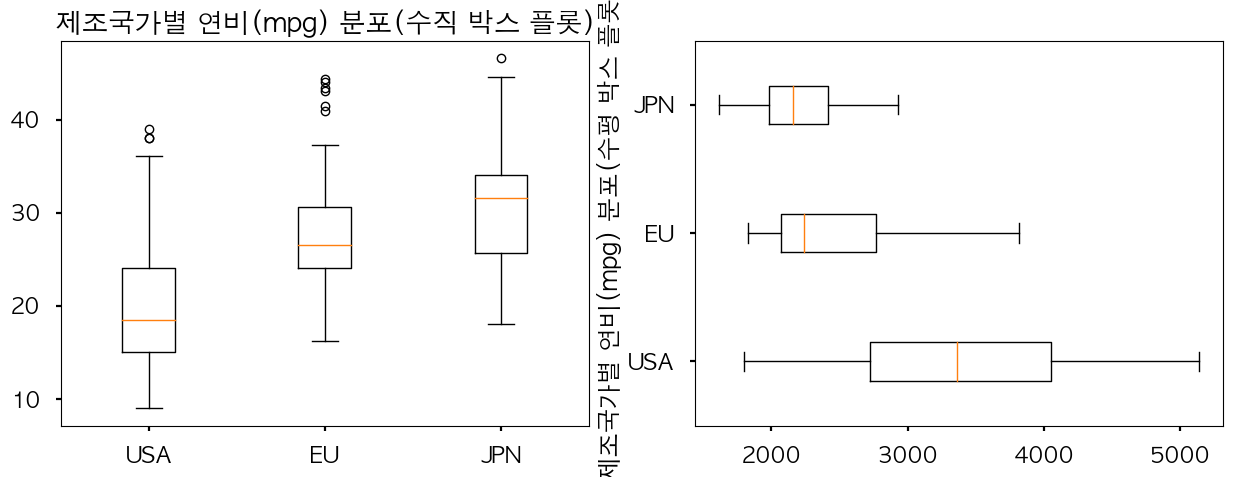

In [60]:
# 4.28_matplotlib_box.py

# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# matplotlib 한글 폰트 오류 해결(mac ver)
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

plt.style.use('seaborn-poster') # 스타일 서식 지정 
plt.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용 시 마이너스 폰트 깨지는 현상 해결

# read_csv() 함수로 df 생성
df = pd.read_csv('/Users/youju/Downloads/5674-833_4th/part4/auto-mpg.csv', header = None)   

df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower',
              'weight', 'acceleration', 'model year', 'origin', 'name']

# 그래프 객체 생성(figure에 2개의 서브 플롯 생성)
fig = plt.figure(figsize = (15, 5)) # 전체 그래프 크기 지정
ax1 = fig.add_subplot(1, 2, 1) # 1행 2열 중 첫 번째 subplot
ax2 = fig.add_subplot(1, 2, 2) # 1행 2열 중 두 번째 subplot

# axe 객체에 boxplot 함수로 그래프 출력
ax1.boxplot(x = [df[df['origin'] == 1]['mpg'],
                 df[df['origin'] == 2]['mpg'],
                 df[df['origin'] == 3]['mpg']],
            labels = ['USA', 'EU', 'JPN'])

ax2.boxplot(x = [df[df['origin'] == 1]['weight'],
                df[df['origin'] == 2]['weight'],
                df[df['origin'] == 3]['weight']],
            labels = ['USA', 'EU', 'JPN'],
            vert = False) # 수평 박스 플롯

ax1.set_title('제조국가별 연비(mpg) 분포(수직 박스 플롯)')
ax2.set_ylabel('제조국가별 연비(mpg) 분포(수평 박스 플롯)')

plt.show() # 변경사항 저장하고 그래프 출력